In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
import matplotlib.pyplot as plt

In [6]:
import nltk

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.ensemble import BaggingClassifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
import xgboost as xgb 

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [17]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
from sklearn.naive_bayes import BernoulliNB

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
from sklearn.svm import SVC

In [23]:
from sklearn.ensemble import VotingClassifier

In [24]:
df=pd.read_csv("spam.csv")


In [25]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [28]:
df.shape

(5572, 2)

In [29]:
df=df.drop_duplicates()

In [30]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:xlabel='Category', ylabel='count'>

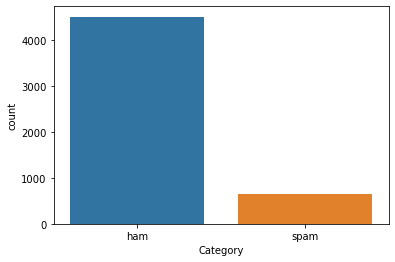

In [31]:
sns.countplot(x=df['Category'])

In [32]:
df['num_characters']=df['Message'].apply(len)

In [33]:
df

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [34]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35
5568,ham,Will ü b going to esplanade fr home?,36,9
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15
5570,ham,The guy did some bitching but I acted like i'd...,125,27


In [36]:
df['num_sentence']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df

,Category,Message,num_characters,num_words,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,Will ü b going to esplanade fr home?,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [38]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [39]:
df

,Category,Message,num_characters,num_words,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,Will ü b going to esplanade fr home?,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [40]:
le=LabelEncoder()


In [41]:
df['Category']=le.fit_transform(df['Category'])


In [42]:
df

,Category,Message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [43]:
df[df['Category']==0].describe()


,Category,num_characters,num_words,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.869353,17.264836,1.806244
std,0.0,56.708301,13.587852,1.281910
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [44]:
df[df['Category']==1].describe()


,Category,num_characters,num_words,num_sentence
count,641.0,641.000000,641.000000,641.000000
mean,1.0,137.118565,27.667707,2.967239
std,0.0,30.399707,7.103501,1.480241
min,1.0,7.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

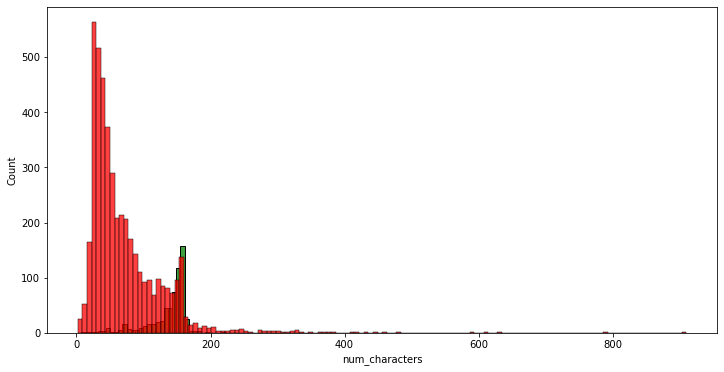

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['num_characters'],color='green')
sns.histplot(df[df['Category']==0]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

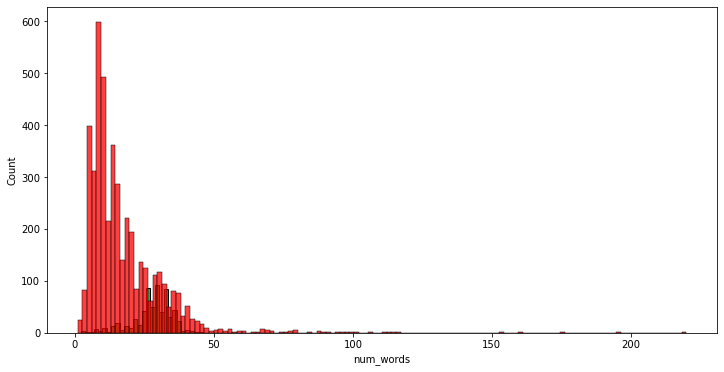

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['num_words'],color='green')
sns.histplot(df[df['Category']==0]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentence', ylabel='Count'>

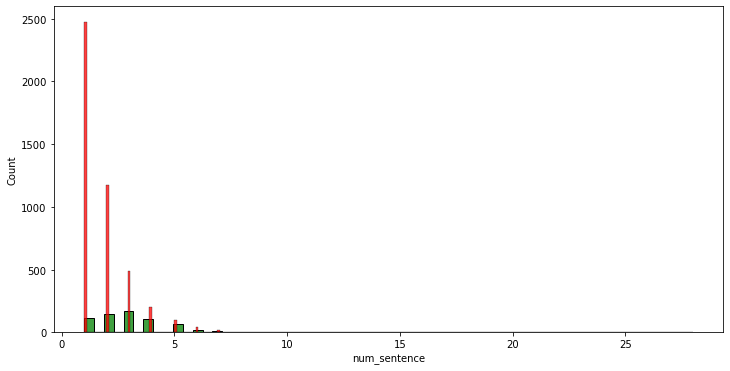

In [47]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['num_sentence'],color='green')
sns.histplot(df[df['Category']==0]['num_sentence'],color='red')

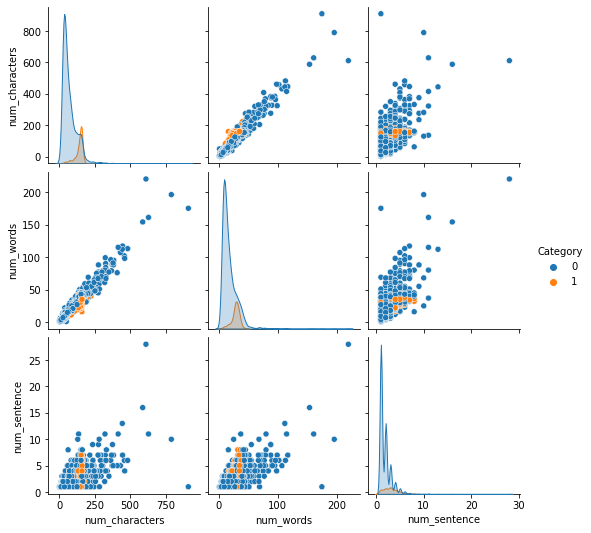

In [48]:
sns.pairplot(data=df,hue='Category')

<AxesSubplot:>

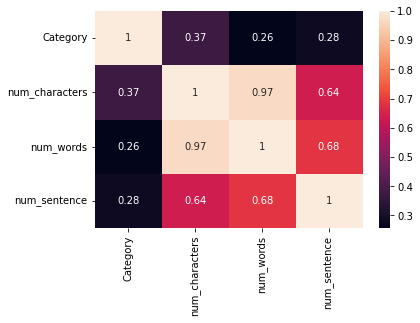

In [49]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. stemming

In [50]:
import nltk

In [51]:
from nltk.stem import PorterStemmer

In [52]:
from nltk.corpus import stopwords

In [53]:
import string

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
ps=PorterStemmer()

In [56]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [57]:
df['transformed_text']=df['Message'].apply(transform_text)

In [58]:
ps.stem("loving")

'love'

In [59]:
df

,Category,Message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [60]:
spam_corpus=[]

In [61]:
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9781

In [63]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [64]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


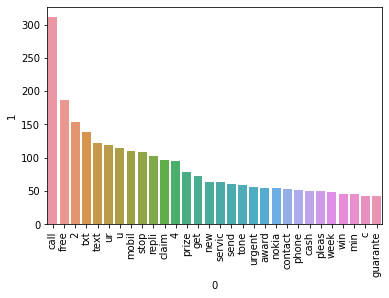

In [65]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
           pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [66]:
ham_corpus=[]

In [67]:
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

35930

In [69]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [70]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


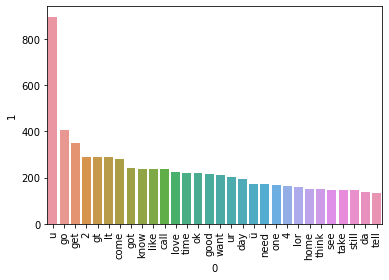

In [71]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
           pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [72]:
#Text Vectorization using Bag of words
df.head()

,Category,Message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [74]:
cv=CountVectorizer()

In [75]:
tfidf=TfidfVectorizer(max_features=3000)

In [76]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [77]:
X.shape

(5157, 3000)

In [78]:
y=df['Category'].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
scaler=MinMaxScaler()


In [81]:
X=scaler.fit_transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# RandomForestClassifier

In [83]:
rfc=RandomForestClassifier()


# LogisticRegression

In [84]:
lr=LogisticRegression()


# KNeighborsClassifier

In [85]:
knc=KNeighborsClassifier()


# XGBClassifier

In [86]:
xgb_i=xgb.XGBClassifier()

# GaussianNB

In [87]:
gaussian_model=GaussianNB()


# MultinomialNB

In [88]:
multinomial_model=MultinomialNB()


# BernoulliNB

In [89]:
bernoulli_model=BernoulliNB()


# ExtraTreesClassifier

In [90]:
extratree_model=ExtraTreesClassifier()


# AdaBoostClassifier

In [91]:
adaboost_model=AdaBoostClassifier()


# DecisionTreeClassifier

In [92]:
dtc=DecisionTreeClassifier()


In [93]:
clfs={
    "xgb":xgb_i,
    "RF":rfc,
    "LR":lr,
    "KNC":knc,
    "DT":dtc,
    "GaussianNB":gaussian_model,
    "BernoulliNB":bernoulli_model,
    "Adaboost":adaboost_model,
    "MultinomialNB":multinomial_model,
    "ETC":extratree_model
}

In [94]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [95]:
train_classifier(xgb_i,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9236641221374046)

In [96]:
accuracy_scores=[]
precision_scores=[]

In [97]:
for key,value in clfs.items():
    current_accuracy,current_precision=train_classifier(value,X_train,y_train,X_test,y_test)
    print("For",key)
    print(current_accuracy,current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For xgb
0.9757751937984496 0.9236641221374046
For RF
0.9767441860465116 0.9666666666666667
For LR
0.9748062015503876 0.9824561403508771
For KNC
0.9098837209302325 1.0
For DT
0.9525193798449613 0.7959183673469388
For GaussianNB
0.877906976744186 0.5213675213675214
For BernoulliNB
0.9854651162790697 0.984
For Adaboost
0.9583333333333334 0.8780487804878049
For MultinomialNB
0.9844961240310077 0.9615384615384616
For ETC
0.9806201550387597 0.967741935483871


In [98]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(),"Precision":precision_scores,"Accuracy":accuracy_scores})

In [99]:
performance_df=performance_df.sort_values(by="Accuracy",ascending=False)

In [100]:
performance_df

,Algorithm,Precision,Accuracy
6,BernoulliNB,0.984000,0.985465
8,MultinomialNB,0.961538,0.984496
9,ETC,0.967742,0.980620
1,RF,0.966667,0.976744
0,xgb,0.923664,0.975775
2,LR,0.982456,0.974806
7,Adaboost,0.878049,0.958333
4,DT,0.795918,0.952519
3,KNC,1.000000,0.909884
5,GaussianNB,0.521368,0.877907


# Model Improvement

In [101]:
svc=SVC(kernel='sigmoid',
    probability=True,
    gamma=1.0,)


In [102]:
nb=MultinomialNB()


In [103]:
rfc= RandomForestClassifier(n_estimators=50, random_state=1)


In [104]:
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [105]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',nb),('rf',rfc)],voting='soft')

In [106]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1))],
                 voting='soft')

In [107]:
y_pred=voting.predict(X_test)


In [108]:
accuracy_score(y_test,y_pred)

0.9864341085271318

In [109]:
precision_score(y_test,y_pred)

0.9841269841269841

In [110]:
import pickle

In [111]:
pickle.dump(bernoulli_model,open("model.pkl","wb"))

In [112]:
pickle.dump(tfidf,open("Vectorizer.pkl","wb"))